- `Written By   :` Mazi Boustani
- `Date         :` 08/10/2021
- `Purpose      :` Step by step introduction into CNN followed by Pytorch example

All images captured from: https://youtu.be/AjtX1N_VT9E

![images_are_numbers](images/images_are_numbers.png)

![tasks_in_computer_vision](images/tasks_in_computer_vision.png)

![learning_feature_representations](images/learning_feature_representations.png)

## Using Neural Network for computer vision and its limitation

![fully_connected_NN](images/fully_connected_NN.png)

### Problem using Neural Network for image data
To be able to use deep neural networks for image dataset, one approach is to stack all pixels in one image on top of each other to create a 1D array of input features feeding into neural network.

![NN_limitations](images/NN_limitations.png)

### Solution
Solution is to let's keep the representation of image as a 2D array of pixel values, and let's not collapse them into 1D array, as in 1D array we lose the spatial information.

Because spatial realted pixels in an image are correlated into each other, we are going to use only patche of data (image) connected to one neruon. Means each neruon will only see patch (subset of image) and not the whole image.

![using_spatial_structure](images/using_spatial_structure1.png)

![using_spatial_structure2](images/using_spatial_structure2.png)

![feature_extraction_Convolution](images/feature_extraction_Convolution.png)

### Kernel (filter)
In Convolutional neural network, the kernel is nothing but a filter that is used to extract the features from the images. The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products.

![the_convolution_operation](images/the_convolution_operation.png)

![the_conv_operation_1](images/the_conv_operation_1.png)

![the_conv_operation_2](images/the_conv_operation_2.png)

Effect of different filters on an image:

![producing_feature_maps](images/producing_feature_maps.png)

## Convolution Nerual Networks (CNNs)
The model will learn the weights end to end, from weights of all filters to weights of fully connected layers.

![CNNs_for_classificasion](images/CNNs_for_classificasion.png)

So there are two sets of weights that we are going to train on CNNs:
- weights in Convolution (filters)
- weights in fully connected layers

![convolution_layers_local_connectivity](images/convolution_layers_local_connectivity.png)

Width and height depends on the input image size, filter size and stride value. Depth depends on different numbers of filter we use.

![spatial_arrangement_of_output_volume](images/spatial_arrangement_of_output_volume.png)

![cnn_relu](images/cnn_relu.png)

### Pooling:
The operation is to reduce the dimensionality of our input while still preserving spatial invariance.

![pooling](images/pooling.png)

CNNs has two parts:

__1- Feature Learning:__ Extracting features from an image 

__2- Task action:__ Classification, Object Detection, Segmentation and more

![CNN_Feature_learning](images/CNN_Feature_learning.png)

![CNN_class_probabilites](images/CNN_class_probabilites.png)

![all_code](images/all_code1.png)
![all_code](images/all_code2.png)
![all_code](images/all_code3.png)

![CNN_many_applications](images/CNN_many_applications.png)

### Object Detection
![object_detection](images/object_detection.jpeg)

### Segmentation
![segmentation](images/segmentation.png)

### Problistic Control
![navigation_from_vision](images/navigation_from_vision.png)

## Code CNN using Pytorch

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

We will do the following steps in order:
1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np


### Download CIFAR dataset using `torchvision`

In [2]:
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

# TODO: normzalize 0.5 --------------
# define image transform
transform = transforms.Compose(
                                [transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
                              )

batch_size = 4

# download train set and transform them
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# download test set and transform them
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# set list of classes
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [3]:
def imshow(img):
    '''
    Function to show an image
    '''
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    # npimg shape: (3, 36, 138)
    npimg_tranpose = np.transpose(npimg, (1, 2, 0))
    # npimg_tranpose shape: (36, 138, 3)
    plt.imshow(npimg_tranpose)
    plt.show()



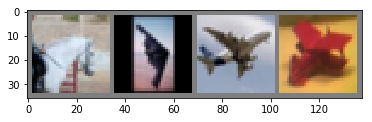

horse plane plane plane


In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images in grid form
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


### Define a Convolution Nerual Network

In [5]:
class CNN(nn.Module):
    '''
    Define a CNN network
    '''
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        
        # dropout
        self.dropout = nn.Dropout(p=.5)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


In [6]:
# define the network
cnn_net = CNN()


### Define a Loss function and optimizer

In [7]:
# define the loss function
loss_function = nn.CrossEntropyLoss()
# define the optimization
optimizer = optim.SGD(cnn_net.parameters(), lr=0.001, momentum=0.9)


### Train the network

In [8]:
num_epochs = 30

for epoch in range(num_epochs):

    running_loss = 0.0
    
    # get each train data one by one
    for i, data in enumerate(trainloader, 0):
        
        # get inputs and labels from one datapoint
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward the network
        output = cnn_net(inputs)
        
        # calculate the loss
        loss = loss_function(output, labels)
        
        # backward the network
        loss.backward()
        
        # optimize the network
        optimizer.step()
        
        # print statistics every 2000 mini batches
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.288
[1,  4000] loss: 2.113
[1,  6000] loss: 1.888
[1,  8000] loss: 1.741
[1, 10000] loss: 1.667
[1, 12000] loss: 1.575
[2,  2000] loss: 1.499
[2,  4000] loss: 1.464
[2,  6000] loss: 1.407
[2,  8000] loss: 1.374
[2, 10000] loss: 1.336
[2, 12000] loss: 1.328
[3,  2000] loss: 1.260
[3,  4000] loss: 1.216
[3,  6000] loss: 1.223
[3,  8000] loss: 1.198
[3, 10000] loss: 1.202
[3, 12000] loss: 1.168
[4,  2000] loss: 1.119
[4,  4000] loss: 1.069
[4,  6000] loss: 1.078
[4,  8000] loss: 1.046
[4, 10000] loss: 1.070
[4, 12000] loss: 1.062
[5,  2000] loss: 0.973
[5,  4000] loss: 0.972
[5,  6000] loss: 0.980
[5,  8000] loss: 0.976
[5, 10000] loss: 0.985
[5, 12000] loss: 0.960
[6,  2000] loss: 0.910
[6,  4000] loss: 0.892
[6,  6000] loss: 0.922
[6,  8000] loss: 0.885
[6, 10000] loss: 0.915
[6, 12000] loss: 0.928
[7,  2000] loss: 0.832
[7,  4000] loss: 0.845
[7,  6000] loss: 0.872
[7,  8000] loss: 0.863
[7, 10000] loss: 0.866
[7, 12000] loss: 0.882
[8,  2000] loss: 0.785
[8,  4000] 

### save our trained model

In [9]:
PATH = './cifar_net.pth'
torch.save(cnn_net.state_dict(), PATH)


### Test the network on the test data

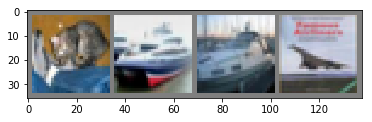

GroundTruth:    cat  ship  ship plane


In [10]:
# get next test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


### load back in our saved model

In [11]:
cnn_net = CNN()
cnn_net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [12]:
outputs = cnn_net(images)


In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


Predicted:    cat  ship  ship plane


### Let us look at how the network performs on the whole dataset.

In [14]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = cnn_net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d%%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 68%


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = cnn_net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))


Accuracy for class plane is: 82.3 %
Accuracy for class car   is: 80.3 %
Accuracy for class bird  is: 59.3 %
Accuracy for class cat   is: 44.2 %
Accuracy for class deer  is: 70.1 %
Accuracy for class dog   is: 53.8 %
Accuracy for class frog  is: 78.5 %
Accuracy for class horse is: 69.2 %
Accuracy for class ship  is: 81.5 %
Accuracy for class truck is: 72.3 %


source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html